In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
# Load the data into a Pandas DataFrame.
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


LinregressResult(slope=0.06304458401213481, intercept=-119.0659419677398, rvalue=0.9847571311825852, pvalue=3.788696979109601e-102, stderr=0.0009692118713287097, intercept_stderr=1.886943381242512)
LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.976287571614062, pvalue=2.4388064141616947e-09, stderr=0.010652933111541111, intercept_stderr=21.375153425608108)


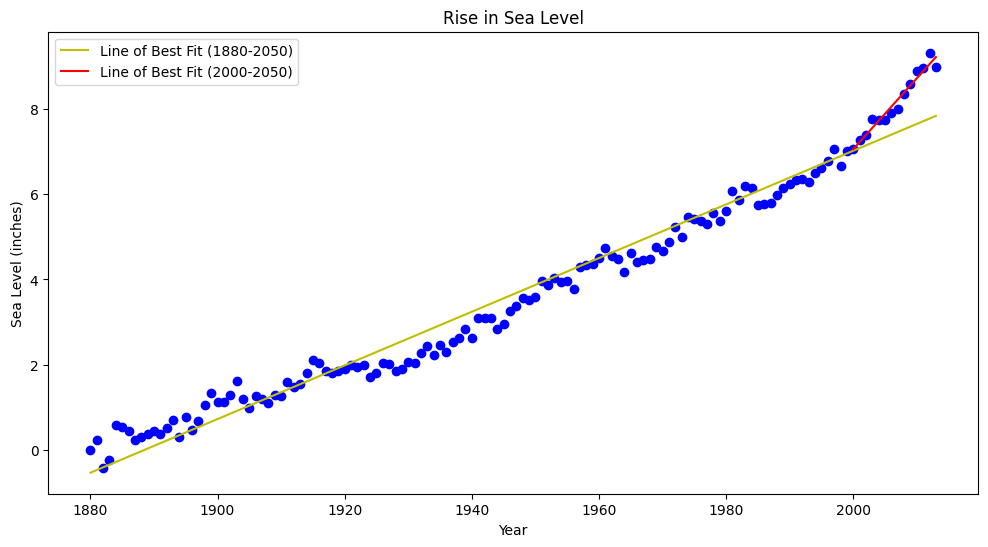

In [3]:
# A new DataFrame, df_2, is created by selecting data from the original DataFrame, df, where the 'Year' column 
# values are 2000 or later, resulting in a subset from 2000 onward.
df_2 = df[df["Year"] >= 2000]

# Convert data from a DataFrame subset to a NumPy array.
years = df["Year"].to_numpy()
sea_level = df["CSIRO Adjusted Sea Level"].to_numpy()

years_2 = df_2["Year"].to_numpy()
sea_level_2 = df_2["CSIRO Adjusted Sea Level"].to_numpy()

# Calculate the first line of best fit. A linear regression is performed between the variables 'years' and 'sea_level,' 
# and the results of this regression (such as slope, intercept, correlation coefficient) are stored in the variable 'res.'
res = linregress(x=years, y=sea_level)
print(res)

# Calculate the second line of best fit for the subset.
res_2 = linregress(x=years_2, y=sea_level_2)
print(res_2)

# Create a scatter plot: Use Matplotlib to create a scatter plot with the Year column as the x-axis 
# and the CSIRO Adjusted Sea Level column as the y-axis. This scatter plot will visualize the sea level data.
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(x=years, y=sea_level, c="b")


# Plot the lines of best fit.
plt.plot(years, res.slope * years + res.intercept, "y", label='Line of Best Fit (1880-2050)')
plt.plot(years_2, res_2.slope * years_2 + res_2.intercept, "r", label='Line of Best Fit (2000-2050)')

# Set labels and title.
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")

# Add a legend.
plt.legend()

# Save the plot as an image.
plt.savefig('sea_level_plot.png')